In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# sets up the Kaggle API by creating a directory, copying the API key file, and setting file permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Downloads the face mask dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 157M/163M [00:01<00:00, 145MB/s]
100% 163M/163M [00:01<00:00, 120MB/s]


In [4]:
# Extracts a compressed dataset using the ZipFile module in Python
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os # access files and directories
import numpy as np # to use numpy arrays 
import matplotlib.pyplot as plt # to plot graphs and visualize data
import matplotlib.image as mpimg # for loading and displaying images
import cv2 # for image processing and computer vision tasks
from google.colab.patches import cv2_imshow # display images in Colab notebooks
from PIL import Image # for opening, manipulating, and saving various image file formats
from sklearn.model_selection import train_test_split # for splitting the dataset into training and testing sets

In [7]:
# returns a list of strings, where each string is the name of the file in with mask
with_mask_files = os.listdir('/content/data/with_mask') 
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1985.jpg', 'with_mask_2086.jpg', 'with_mask_3250.jpg', 'with_mask_1157.jpg', 'with_mask_1618.jpg']
['with_mask_1494.jpg', 'with_mask_2823.jpg', 'with_mask_2776.jpg', 'with_mask_801.jpg', 'with_mask_791.jpg']


In [8]:
# returns a list containing the names of the without mask entries 
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2661.jpg', 'without_mask_3219.jpg', 'without_mask_1505.jpg', 'without_mask_988.jpg', 'without_mask_1498.jpg']
['without_mask_21.jpg', 'without_mask_195.jpg', 'without_mask_2282.jpg', 'without_mask_2693.jpg', 'without_mask_2075.jpg']


In [9]:
# print the length of the lists
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create labels that correspond to the class of each image in the dataset

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
# check if they were created correctly
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
# displaying with mask image
# concatenating the two lists
labels = with_mask_labels + without_mask_labels
# verify that the list is created correctly
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


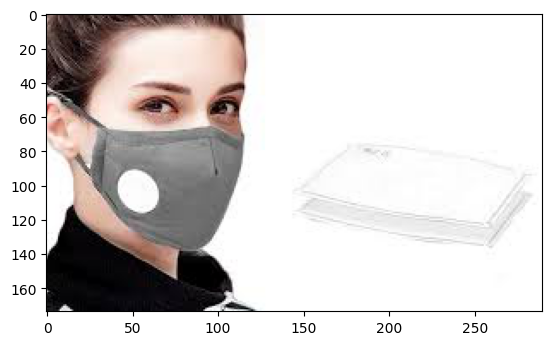

In [13]:
# reads the image file
img = mpimg.imread('/content/data/with_mask/with_mask_2323.jpg')
# creates a plot of the image
imgplot = plt.imshow(img)
# displays the plot
plt.show()

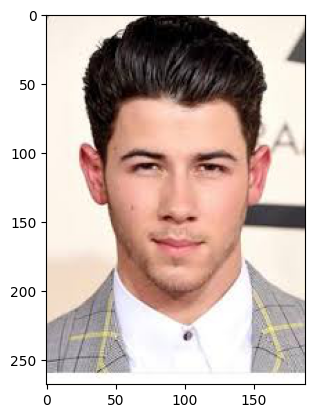

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2733.jpg')
imgplot = plt.imshow(img)
plt.show()
# Note: Image size vary

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file) # concatenate directory path and filename of a specific image
  image = image.resize((128,128)) # CNN model will require same size image inputs
  image = image.convert('RGB') # input image may not have been in the RGB color mode initially
  image = np.array(image) # converts the image NumPy array
  data.append(image) # data list is used to store all the preprocessed images


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
data[0] # gives you the first image in the list, which is a 3-dimensional numpy array containing the pixel values of the image

array([[[ 17,  21,  32],
        [ 17,  21,  32],
        [ 23,  27,  38],
        ...,
        [141, 115, 103],
        [138, 116, 102],
        [135, 117,  98]],

       [[ 20,  22,  34],
        [ 21,  23,  34],
        [ 23,  26,  37],
        ...,
        [136, 114, 103],
        [132, 113, 100],
        [130, 114,  98]],

       [[ 26,  27,  36],
        [ 27,  29,  38],
        [ 27,  29,  38],
        ...,
        [133, 112, 101],
        [127, 110,  98],
        [127, 113,  97]],

       ...,

       [[201, 221, 222],
        [199, 220, 220],
        [190, 211, 212],
        ...,
        [129, 199, 201],
        [130, 203, 200],
        [157, 213, 210]],

       [[206, 229, 226],
        [202, 227, 224],
        [183, 211, 207],
        ...,
        [133, 205, 208],
        [120, 197, 194],
        [148, 210, 207]],

       [[192, 217, 214],
        [183, 212, 207],
        [175, 207, 201],
        ...,
        [137, 211, 215],
        [112, 192, 191],
        [139, 208, 204]]

In [19]:
type(data[0])  # the object stored in data[0] is a NumPy array

numpy.ndarray

In [20]:
data[0].shape # returns the dimensions of the first element in the data array

(128, 128, 3)

In [21]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape) # 4D array: number of samples, height, width, color
print(Y.shape) # 1D array: number of labels 

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


In [26]:
# X: input data, Y: corresponding labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
# verify data has been split correctly, ensure training and test sets have expected dimensions
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
# scaling the data to achieve better performance and convergence rate 

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [29]:
X_train[0]

array([[[20, 13, 12],
        [21, 12, 12],
        [24, 15, 13],
        ...,
        [49, 29, 28],
        [48, 28, 26],
        [42, 25, 22]],

       [[21, 14, 11],
        [28, 17, 15],
        [32, 20, 16],
        ...,
        [60, 36, 33],
        [58, 35, 31],
        [50, 31, 28]],

       [[52, 34, 33],
        [58, 37, 35],
        [61, 37, 33],
        ...,
        [54, 35, 32],
        [51, 32, 29],
        [44, 29, 28]],

       ...,

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [18, 18, 21],
        [20, 20, 22],
        [21, 21, 24]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 7,  7,  8],
        [15, 15, 17],
        [18, 18, 21]],

       [[19, 19, 19],
        [18, 18, 18],
        [19, 19, 19],
        ...,
        [21, 21, 21],
        [23, 23, 25],
        [28, 28, 30]]], dtype=uint8)

In [30]:
X_train_scaled[0]

array([[[0.07843137, 0.05098039, 0.04705882],
        [0.08235294, 0.04705882, 0.04705882],
        [0.09411765, 0.05882353, 0.05098039],
        ...,
        [0.19215686, 0.11372549, 0.10980392],
        [0.18823529, 0.10980392, 0.10196078],
        [0.16470588, 0.09803922, 0.08627451]],

       [[0.08235294, 0.05490196, 0.04313725],
        [0.10980392, 0.06666667, 0.05882353],
        [0.1254902 , 0.07843137, 0.0627451 ],
        ...,
        [0.23529412, 0.14117647, 0.12941176],
        [0.22745098, 0.1372549 , 0.12156863],
        [0.19607843, 0.12156863, 0.10980392]],

       [[0.20392157, 0.13333333, 0.12941176],
        [0.22745098, 0.14509804, 0.1372549 ],
        [0.23921569, 0.14509804, 0.12941176],
        ...,
        [0.21176471, 0.1372549 , 0.1254902 ],
        [0.2       , 0.1254902 , 0.11372549],
        [0.17254902, 0.11372549, 0.10980392]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

**Building a Convolutional Neural Networks (CNN)**

```
# This is formatted as code
```



In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
num_of_classes = 2  # with or without mask

# add layers to the network one by one
model = keras.Sequential()

# a convolutional layer, 32 filters to the input image, each of size 3x3 pixels, ReLU to introduce non-linearity
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3))) 
# reduces the spatial size (height and width) to prevent overfitting
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# second layer with 64 filters, extracting more complex features
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# reducing the spatial size of the input volume again
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# flattened into a 1D vector for the fully connected layers
model.add(keras.layers.Flatten())

# further process the information extracted by the convolutional layers
model.add(keras.layers.Dense(128, activation='relu'))
# prevent overfitting by randomly dropping out 50% of the neurons from previous layer
model.add(keras.layers.Dropout(0.5))

# another fully connected layer, making a prediction about the class of the input image
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # Another dropout layer

# fully connected output layer with 2 neurons, producing probability output for each class
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [33]:
# compile the neural network, specifying the optimizer, loss function, and metrics to use during the training process
model.compile(optimizer='adam',                       # optimization algorithm to adjust the weights and biases of neural network
              loss='sparse_categorical_crossentropy', # minimize the loss function
              metrics=['acc'])                        # evaluated based on the percentage of correctly predicted labels

In [34]:
# training the neural network, 10% of data is for validation and the training process goes through the dataset 5 times
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)


# Over each epoch, the training accuracy increases, while the training loss decreases: no overfitting to the training data
# The model achieved a training accuracy of ~93% and a validation accuracy of ~92%
# This suggests that the model has learned to accurately classify the data and perform well on new, unseen data.

Epoch 1/5
170/170 [==============================] - 17s 23ms/step - loss: 0.4770 - acc: 0.7911 - val_loss: 0.2581 - val_acc: 0.8975
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2900 - acc: 0.8862 - val_loss: 0.2109 - val_acc: 0.9174
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2400 - acc: 0.9047 - val_loss: 0.2299 - val_acc: 0.9124
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2016 - acc: 0.9248 - val_loss: 0.2017 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1803 - acc: 0.9314 - val_loss: 0.2200 - val_acc: 0.9174


**Model Evaluation**

In [35]:
# evaluating the performance of trained neural network on test data set
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.1929 - acc: 0.9351
Test Accuracy = 0.9351422786712646


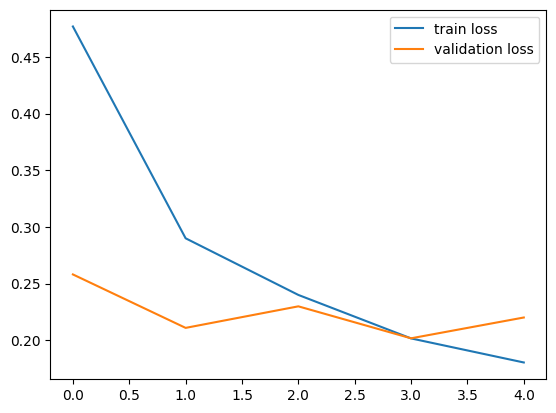

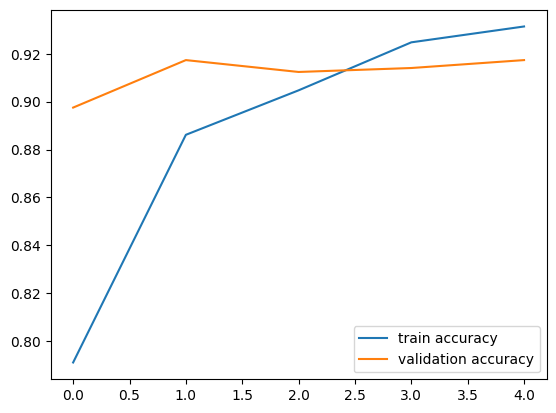

In [38]:
# visualize training and validation loss & training and validation accuracy of neural network during the training process
h = history

# trend of loss function on the training and validation data over each epoch of training
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# trend of accuracy on the training and validation data over each epoch of training
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/WearingMask.jpg


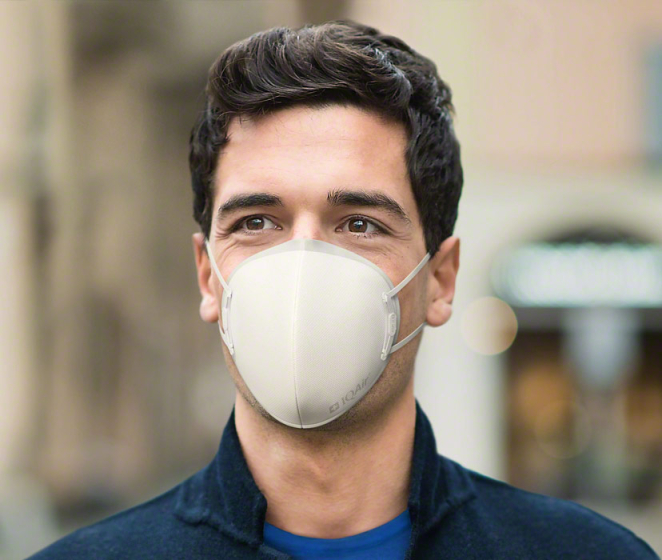

1/1 [==============================] - 0s 29ms/step
[[0.3549832  0.68505365]]
1
The person in the image is wearing a mask


In [50]:
# path of the image file they want to make a prediction on
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/NoMask1.png


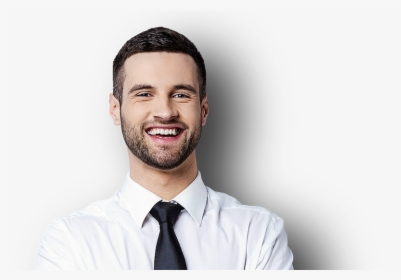

1/1 [==============================] - 0s 19ms/step
[[0.5192695  0.49579293]]
0
The person in the image is not wearing a mask


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/mask3 (1).jpg


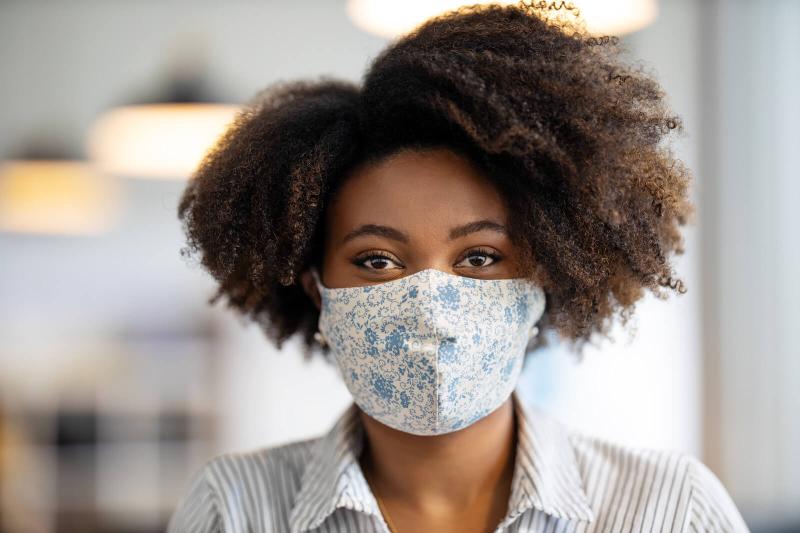

1/1 [==============================] - 0s 35ms/step
[[0.36813188 0.6914664 ]]
1
The person in the image is wearing a mask


In [53]:
# path of the image file they want to make a prediction on
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')